# Определение перспективного тарифа для телеком компании

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента v. 1:</b> <br>
30% Ультра, 69% Смарт и 1% - ноль. Я засомневалась, удалять их или нет. Потом хотела посмотреть, где именно они находятся, и не нашла. Посмотри, пожалуйста, начало пункта 4. И потом просто забила на них, ведь их мало.

<div class="alert alert-block alert-info">
Комментарий ревьюера v. 2:
    
Теперь поняла о чём речь. Скорее всего, это техническая ошибка или ошибка при заполнении данных. Лучше эти данные, так как их порядка 1 % удалить. Молодец, что обратила на это внимание.
</div>


## Описание проекта
«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. <br>
Нужно сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

  <b>Описание тарифов</b>

Тариф «Смарт» <br>
1.	Ежемесячная плата: 550 рублей <br>
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика <br>
3.	Стоимость услуг сверх тарифного пакета:<br>
•	минута разговора: 3 рубля<br>
•	сообщение: 3 рубля<br>
•	1 Гб интернет-трафика: 200 рублей<br>
<br>

Тариф «Ультра»<br>
1.	Ежемесячная плата: 1950 рублей<br>
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br>
3.	Стоимость услуг сверх тарифного пакета:<br> 
•	минута разговора: 1 рубль<br>
•	сообщение: 1 рубль<br>
•	1 Гб интернет-трафика: 150 рублей

## Обзор данных и их обработка

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
users = pd.read_csv('/datasets/users.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

### О звонках

In [3]:
calls.info()
calls.sample(7, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
158741,1392_406,2018-07-09,4.94,1392
95947,1244_202,2018-11-09,0.00,1244
10624,1027_494,2018-10-07,3.10,1027
167423,1412_340,2018-09-25,5.91,1412
73194,1184_168,2018-09-03,9.86,1184
176140,1435_58,2018-12-21,2.31,1435
41601,1102_28,2018-09-21,2.44,1102


In [4]:
calls.duplicated().sum()

0

In [5]:
calls.query('duration == 0.00')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


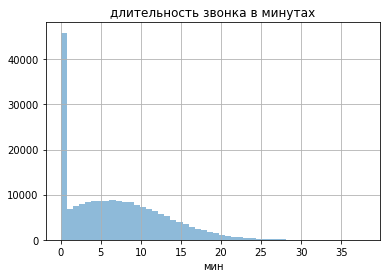

In [6]:
plt.title('длительность звонка в минутах')
plt.xlabel('мин')
calls['duration'].hist(bins=50, alpha=0.5)
plt.show()

На графике видно, что разговор обычно длится 1-15 мин, более 20 мин значения редки. Также увидели пик в 0 минут, решили удалить. 

Пропусков нет. Дубликатов нет. Тип данных call_date нужно заменить на datetime. <br> В задании сказано, что оператор очень жадный и округляет звонки в 1 секунду до 1 минуты. И 3 мин 1 сек = 4 мин. Значит, можно округлить все значения до минут. <br> И удалить почти 40 тысяч нолей - 20% всего дф? Ведь мы должны рассчитать выручку, а из ноликов её не получишь... Удаляем! Можно предположить, что сюда вошли потери связи со стороны оператора/устройства или же случился недозвон (занято, не берет трубку). Смотрим гисто

In [7]:
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)
calls.sample(7, random_state=42)

,id,call_date,duration,user_id
158741,1392_406,2018-07-09,5,1392
95947,1244_202,2018-11-09,0,1244
10624,1027_494,2018-10-07,4,1027
167423,1412_340,2018-09-25,6,1412
73194,1184_168,2018-09-03,10,1184
176140,1435_58,2018-12-21,3,1435
41601,1102_28,2018-09-21,3,1102


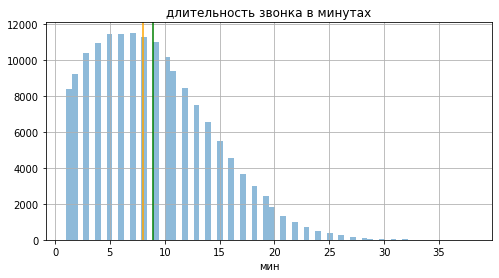

In [8]:
calls['duration'] = calls['duration'].replace(0, np.nan)
calls = calls.dropna()
calls['duration'].hist(bins=70, alpha=0.5, figsize=(8,4))
plt.title('длительность звонка в минутах')
plt.axvline(calls['duration'].median(), c='orange')
plt.axvline(calls['duration'].mean(), c='green')
plt.xlabel('мин')
plt.show()

Text(0.5, 0, 'мин')

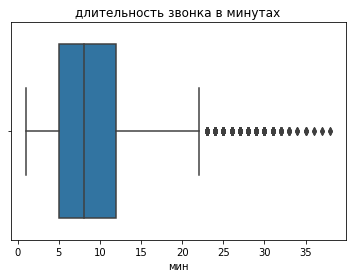

In [9]:
ax = sns.boxplot(x=calls['duration'])
plt.title('длительность звонка в минутах')
plt.xlabel('мин')

Смотрим на гистограмму после удаления нолей. Показали медиану - 8 мин, это длительность разговора в среднем. <br>
    
Распределение скошено направо: медиана 8 меньше среднего 9. Значит, самая высокая повторяемость значений находится слева от среднего. Выбросы сверх 22 минут.

### О пользователях

In [10]:
users.info()
users.sample(7, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
361,1361,38,NaN,Екатеринбург,Рената,Кошелева,2018-09-09,ultra
73,1073,63,NaN,Владикавказ,Гордей,Павловский,2018-10-04,smart
374,1374,67,NaN,Махачкала,Леонид,Аркадьев,2018-04-01,smart
155,1155,71,NaN,Ставрополь,Александр,Чернов,2018-01-02,smart
104,1104,60,NaN,Нижний Тагил,Габриэль,Поляков,2018-02-21,ultra
394,1394,47,NaN,Орёл,Ксения,Жукова,2018-01-12,smart
377,1377,59,NaN,Брянск,Альфред,Семин,2018-02-25,ultra


In [11]:
users.duplicated().sum()

0

In [12]:
users['user_id'].count()

500

Дублей нет. Много пропусков в churn_date. В задании сказано, что это "дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)". Поэтому не будем трогать. <br> Тип данных reg_date нужно заменить на datetime.

### О сообщениях

In [13]:
messages.info()
messages.sample(7, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
8581,1033_332,2018-11-08,1033
12476,1054_32,2018-08-10,1054
14805,1065_141,2018-05-29,1065
118278,1481_49,2018-05-24,1481
23803,1099_10,2018-08-24,1099
93256,1383_7,2018-11-04,1383
81126,1340_100,2018-07-01,1340


In [14]:
messages.duplicated().sum()

0

Пропусков и дубликатов нет. Тип данных message_date нужно заменить на datetime.

### Об интернет-сессиях

In [15]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [16]:
internet.duplicated().sum()

0

Пропусков и дубликатов нет. Тип данных session_date нужно заменить на datetime. <br> 
В задании сказано, что оператор также округляет вверх значения мегабайтов. Можно округлить и изменить тип данных. <br> 
Далее может быть нужен столбец трафика в гигабайтах, т.к. тариф указан за гб.

In [17]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype(int)
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113,2018-11-25,1000
1,1,1000_1,1053,2018-09-07,1000
2,2,1000_2,1198,2018-06-25,1000
3,3,1000_3,551,2018-08-22,1000
4,4,1000_4,303,2018-09-24,1000


In [18]:
internet.query('mb_used < 0.01')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0,2018-08-28,1000
38,38,1000_38,0,2018-11-27,1000
46,46,1000_46,0,2018-06-30,1000
67,67,1000_67,0,2018-06-16,1000
72,72,1000_72,0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0,2018-12-11,1499
149381,149381,1499_142,0,2018-11-01,1499
149383,149383,1499_144,0,2018-11-27,1499
149386,149386,1499_147,0,2018-10-21,1499


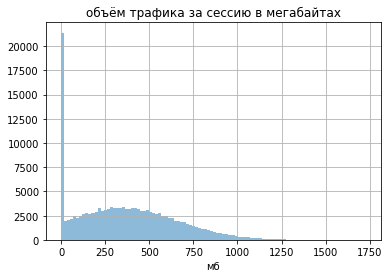

In [19]:
internet['mb_used'].hist(bins=100, alpha=0.5)
plt.title('объём трафика за сессию в мегабайтах')
plt.xlabel('мб')
plt.show()

Видим, что 10% дф с нулевым значением мегабайтов. Удаляем, как и 0 минут.

Нулевые значения в использовании интернет трафика: Также как и с разговорами в 0 минут, можно предположить, что нулевой трафик связан с некачественным соединением со стороны оператора или устройства. Попытка входа регистрируется, а трафика нет?

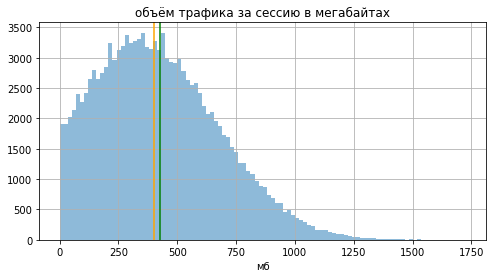

In [20]:
internet['mb_used'] = internet['mb_used'].replace(0, np.nan)
internet = internet.dropna()
internet['mb_used'].hist(bins=100, alpha=0.5, figsize=(8,4))
plt.axvline(internet['mb_used'].median(), c='orange')
plt.axvline(internet['mb_used'].mean(), c='green') 
plt.title('объём трафика за сессию в мегабайтах')
plt.xlabel('мб')
plt.show()

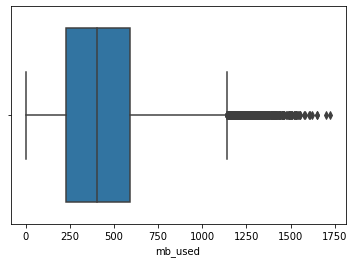

In [21]:
ax = sns.boxplot(x=internet['mb_used']) 

Распределение асимметричное скошенное: медиана немного меньше среднего, график с хвостом справа. Значит, самая высокая повторяемость значений находится слева от среднего. Большинство выбросов присутствует в правой части, сверх 1100 мб.

### О тарифах

In [22]:
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Тут всё ок.

In [23]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

In [24]:
calls['month'] = pd.to_datetime(calls['call_date']).dt.month 
messages['month'] = pd.to_datetime(messages['message_date']).dt.month
internet['month'] = pd.to_datetime(internet['session_date']).dt.month
calls.head()

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9


Поменяли тип данных у нужных столбцов и ввели новый - "месяц".

Проанализировали каждый из пяти датафреймов, можно перейти к дальнейшей обработке и созданию объединенного дф.

## Обработка пользовательских данных

### Звонки, смс, трафик по месяцам

In [25]:
#calls_month = calls.groupby(['user_id', 'month'])['duration'].agg(['sum']).reset_index()
#messages_month = messages.groupby(['user_id', 'month'])['id'].agg(['count']).reset_index()
#internet_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum']).reset_index()

In [26]:
calls_month = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
messages_month = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index() 
internet_month = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()

Посчитали для каждого пользователя по месяцам: количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного трафика. Далее склеили новый дф.

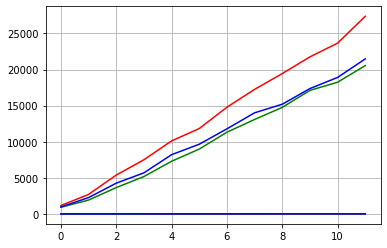

In [27]:
calls1 = calls.groupby('month')['id'].count().reset_index()
messages1 = messages.groupby('month')['id'].count().reset_index()
internet1 = internet.groupby('month')['id'].count().reset_index()

def troika():
    plt.plot(calls1, color='red')
    plt.plot(messages1, color='green')
    plt.plot(internet1, color='blue')
    plt.grid(True)
    plt.show()

troika()

Смотрим каким типом связи пользуются чаще всего (по месяцам). Чаще всего совершают звонки. Но выглядит график так, как будто оператор появился только в начале года. Или тарифы появились в начале года?

### Создание нового датафрейма

In [28]:
df = users.merge(calls_month, on='user_id', how='left')
df = df.merge(internet_month, on=['user_id','month'], how='outer')
df = df.merge(messages_month, on=['user_id','month'], how='outer')
df = df.merge(tariffs, left_on='tariff', right_on='tariff_name', how='left')

In [29]:
pd.set_option('display.max_columns', None) 

In [30]:
def obzor (d, n):
    return pd.concat([d.head(n), d.sample(n, random_state=42), d.tail(n)], axis=0)
obzor(df, 3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,mb_used,id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,2256.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra
1,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,23257.0,60.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra
2,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,14016.0,75.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra
299,1048,73.0,NaN,Новокузнецк,Лола,Мясникова,2018-08-19,ultra,12.0,688.0,8186.0,78.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra
501,1079,20.0,NaN,Москва,Еремей,Авроров,2018-05-15,smart,12.0,578.0,11156.0,35.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart
631,1100,58.0,NaN,Санкт-Петербург,Руслан,Красильников,2018-07-02,smart,11.0,530.0,17140.0,49.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart
3219,1489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,19588.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3220,1489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,17516.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,1489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,17341.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски в tail() говорят нам о том, что пользователь сидит в интернете, но не совершает звонков, не пишет смс. То есть любой пользователь может использовать одну/две из опций связи. Заполним пропуски нулями.

In [31]:
# type?

In [32]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 20 columns):
user_id                  3222 non-null int64
age                      3222 non-null float64
churn_date               3222 non-null object
city                     3222 non-null object
first_name               3222 non-null object
last_name                3222 non-null object
reg_date                 3222 non-null object
tariff                   3222 non-null object
month                    3222 non-null float64
duration                 3222 non-null float64
mb_used                  3222 non-null float64
id                       3222 non-null float64
messages_included        3222 non-null float64
mb_per_month_included    3222 non-null float64
minutes_included         3222 non-null float64
rub_monthly_fee          3222 non-null float64
rub_per_gb               3222 non-null float64
rub_per_message          3222 non-null float64
rub_per_minute           3222 non-null float64
tariff_n

Использовали метод merge для объединения пяти датафреймов, получили новый дф из 3222 строк.

### Выручка с каждого пользователя по месяцам

In [33]:
df['min_over'] = (df['duration'] - df['minutes_included'])  *  df['rub_per_minute']
df.loc[df['min_over'] < 0, 'min_over'] = 0

# np.where ?

In [34]:
df['mb_over'] = (df['mb_used'] - df['mb_per_month_included']) / 1024 *  df['rub_per_gb']
df.loc[df['mb_over'] < 0, 'mb_over'] = 0

In [35]:
df['sms_over'] = (df['id'] - df['messages_included'])  *  df['rub_per_message']
df.loc[df['sms_over'] < 0, 'sms_over'] = 0

Отрицательные значения заменили на 0: отрицательный перерасход означает, что перерасхода не было, он нулевой. Положительный перерасход трафика перевели в гигабайты.

In [36]:
obzor(df, 3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,mb_used,id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,min_over,mb_over,sms_over
0,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,2256.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,0.00000,0.0
1,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,23257.0,60.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,0.00000,0.0
2,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,14016.0,75.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,0.00000,0.0
299,1048,73.0,0,Новокузнецк,Лола,Мясникова,2018-08-19,ultra,12.0,688.0,8186.0,78.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,0.00000,0.0
501,1079,20.0,0,Москва,Еремей,Авроров,2018-05-15,smart,12.0,578.0,11156.0,35.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart,234.0,0.00000,0.0
631,1100,58.0,0,Санкт-Петербург,Руслан,Красильников,2018-07-02,smart,11.0,530.0,17140.0,49.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart,90.0,347.65625,0.0
3219,1489,0.0,0,0,0,0,0,0,10.0,0.0,19588.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0
3220,1489,0.0,0,0,0,0,0,0,11.0,0.0,17516.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0
3221,1489,0.0,0,0,0,0,0,0,12.0,0.0,17341.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0


In [37]:
df['month_revenue'] = df['rub_monthly_fee'] + df['min_over'] + df['mb_over'] + df['sms_over']
#df.sample(7, random_state=42)
obzor(df, 3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,mb_used,id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,min_over,mb_over,sms_over,month_revenue
0,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,2256.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,0.00000,0.0,1950.00000
1,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,23257.0,60.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,0.00000,0.0,1950.00000
2,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,14016.0,75.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,0.00000,0.0,1950.00000
299,1048,73.0,0,Новокузнецк,Лола,Мясникова,2018-08-19,ultra,12.0,688.0,8186.0,78.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,0.00000,0.0,1950.00000
501,1079,20.0,0,Москва,Еремей,Авроров,2018-05-15,smart,12.0,578.0,11156.0,35.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart,234.0,0.00000,0.0,784.00000
631,1100,58.0,0,Санкт-Петербург,Руслан,Красильников,2018-07-02,smart,11.0,530.0,17140.0,49.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart,90.0,347.65625,0.0,987.65625
3219,1489,0.0,0,0,0,0,0,0,10.0,0.0,19588.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0,0.00000
3220,1489,0.0,0,0,0,0,0,0,11.0,0.0,17516.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0,0.00000
3221,1489,0.0,0,0,0,0,0,0,12.0,0.0,17341.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0,0.00000


Рассчитали для каждого пользователя выручку. 

In [38]:
df = df.rename(columns={'id':'sms_used'})   # переименовала столбец смс

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 24 columns):
user_id                  3222 non-null int64
age                      3222 non-null float64
churn_date               3222 non-null object
city                     3222 non-null object
first_name               3222 non-null object
last_name                3222 non-null object
reg_date                 3222 non-null object
tariff                   3222 non-null object
month                    3222 non-null float64
duration                 3222 non-null float64
mb_used                  3222 non-null float64
sms_used                 3222 non-null float64
messages_included        3222 non-null float64
mb_per_month_included    3222 non-null float64
minutes_included         3222 non-null float64
rub_monthly_fee          3222 non-null float64
rub_per_gb               3222 non-null float64
rub_per_message          3222 non-null float64
rub_per_minute           3222 non-null float64
tariff_n

In [40]:
df.describe()

,user_id,age,month,duration,mb_used,sms_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,min_over,mb_over,sms_over,month_revenue
count,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,1251.653631,46.006518,8.296710,450.124457,17184.810366,38.186220,330.276226,19683.873371,1232.309125,956.238361,182.355680,2.365611,2.365611,86.349162,406.334729,12.037244,1460.959497
std,144.681431,17.354843,2.931186,242.651130,7617.264263,36.153654,434.142824,7380.540758,1147.309884,647.414941,31.615022,0.953646,0.953646,219.001482,649.159004,34.489075,799.826880
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1125.000000,31.000000,6.000000,281.250000,12472.250000,9.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,665.283203
50%,1253.000000,46.000000,9.000000,442.500000,16940.500000,30.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1504.882812
75%,1378.750000,62.000000,11.000000,588.750000,21438.000000,57.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,0.000000,679.003906,0.000000,1950.000000
max,1499.000000,75.000000,12.000000,1673.000000,49789.000000,224.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,2805.000000,4541.015625,279.000000,6711.015625


In [41]:
np.var(df['month_revenue'])

639524.4889295655

In [42]:
np.std(df['month_revenue'])

799.7027503576347

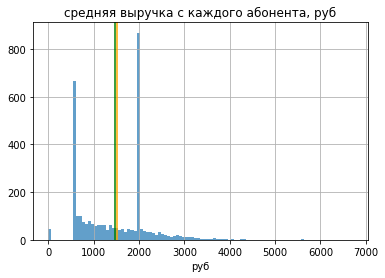

In [43]:
df['month_revenue'].hist(bins=100, alpha=0.7)
plt.title('средняя выручка с каждого абонента, руб')
plt.xlabel('руб')
plt.axvline(df['month_revenue'].median(), c='orange')
plt.axvline(df['month_revenue'].mean(), c='green')
plt.show()

Видим пики на абонплатах, платежи более 3000 весьма редки.

Логично предположить, что если стоимость тарифа с самой высокой платой равна 1950 рублям и 70% абонентов используют тариф за 550 рублей, то с очень низкой долей вероятности платеж будет больше 3000 рублей. <br> 
И работает ли тут правило 3х сигм? Если я правильно поняла: среднее 1460, медиана 1500, стандартное отклонение 800. Тогда по правилу трёх сигм выручка в 99% случаев будет в интервале между -940 и 3860 (1460-800*3; 1460+800*3). И значит платежи свыше 3860 очень-очень маловероятны.

## Анализ

In [44]:
df['tariff_name'].value_counts(normalize=True)

smart    0.689944
ultra    0.295779
0        0.014277
Name: tariff_name, dtype: float64

69% используют тариф Смарт, 30% - Ультра. Еще откуда-то появился ноль?..

In [45]:
df[(df['tariff_name'].isnull())]    # пусто? О_о
df.tariff.isna().any().sum()

0

In [46]:
df[df['tariff_name'].isna()]     # и где этот ноль?

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,mb_used,sms_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,min_over,mb_over,sms_over,month_revenue


In [47]:
df.groupby(['tariff_name'])['duration', 'mb_over', 'sms_over'].agg(['sum']).reset_index()

,tariff_name,duration,mb_over,sms_over
,,sum,sum,sum
0,0,0.0,0.000000e+00,0.0
1,smart,931577.0,1.203201e+06,38784.0
2,ultra,518724.0,1.060091e+05,0.0


Какие берут услуги сверх пакета : Смарт - все услуги, Ультра - намного меньше доп минут (достаточное количество включено в тариф), нет доп смс.

In [48]:
year_revenue = df['month_revenue'].sum()
year_revenue 

4707211.498046875

In [49]:
df.groupby(['tariff_name'])['month_revenue'].agg(['sum', 'mean'])

,sum,mean
tariff_name,,
0,0.000000e+00,0.000000
smart,2.742852e+06,1233.851717
ultra,1.964359e+06,2061.237283


Большую долю дохода приносит тариф Смарт, ведь около 70% клиентов используют его. <br> 
Общая выручка за год - 4,7 млн руб. <br>
По тарифу Смарт - 2,74 млн <br>
По тарифу Ультра - 1,96 млн <br>
Средний платеж в месяц на 60% меньше (1234 р) по сравнению с тарифом Ультра (2061 р).

In [50]:
df[['duration', 'mb_used', 'sms_used', 'month_revenue']].describe().style.format('{:.2f}')

,duration,mb_used,sms_used,month_revenue
count,3222.00,3222.00,3222.00,3222.00
mean,450.12,17184.81,38.19,1460.96
std,242.65,7617.26,36.15,799.83
min,0.00,0.00,0.00,0.00
25%,281.25,12472.25,9.00,665.28
50%,442.50,16940.50,30.00,1504.88
75%,588.75,21438.00,57.00,1950.00
max,1673.00,49789.00,224.00,6711.02


### Тариф Смарт

In [51]:
smart_month = df.query('tariff_name == "smart"')
ultra_month = df.query('tariff_name == "ultra"')
smart_month.sample(7)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,mb_used,sms_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,min_over,mb_over,sms_over,month_revenue
683,1109,64.0,0,Санкт-Петербург,Екатерина,Андрющенко,2018-02-23,smart,12.0,471.0,15679.0,2.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart,0.0,62.304688,0.0,612.304688
860,1138,23.0,0,Екатеринбург,Леся,Ерофеева,2018-07-13,smart,9.0,701.0,23789.0,2.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart,603.0,1646.289062,0.0,2799.289062
746,1119,53.0,0,Петрозаводск,Олег,Сухарев,2018-04-22,smart,8.0,272.0,16485.0,51.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart,0.0,219.726562,3.0,772.726562
453,1071,20.0,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,5.0,365.0,14627.0,8.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart,0.0,0.000000,0.0,550.000000
3172,1499,35.0,0,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,70.0,1848.0,11.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart,0.0,0.000000,0.0,550.000000
2932,1460,64.0,0,Ижевск,Арина,Абашкина,2018-04-06,smart,12.0,671.0,14277.0,45.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart,513.0,0.000000,0.0,1063.000000
359,1056,73.0,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart,10.0,140.0,8682.0,16.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,smart,0.0,0.000000,0.0,550.000000


In [52]:
smart_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 8 to 3175
Data columns (total 24 columns):
user_id                  2223 non-null int64
age                      2223 non-null float64
churn_date               2223 non-null object
city                     2223 non-null object
first_name               2223 non-null object
last_name                2223 non-null object
reg_date                 2223 non-null object
tariff                   2223 non-null object
month                    2223 non-null float64
duration                 2223 non-null float64
mb_used                  2223 non-null float64
sms_used                 2223 non-null float64
messages_included        2223 non-null float64
mb_per_month_included    2223 non-null float64
minutes_included         2223 non-null float64
rub_monthly_fee          2223 non-null float64
rub_per_gb               2223 non-null float64
rub_per_message          2223 non-null float64
rub_per_minute           2223 non-null float64
tariff_n

In [53]:
#smart_month.describe()
smart_month[['duration', 'mb_used', 'sms_used', 'month_revenue']].describe().style.format('{:.2f}')

,duration,mb_used,sms_used,month_revenue
count,2223.00,2223.00,2223.00,2223.00
mean,419.06,16216.86,33.36,1233.85
std,189.33,5900.91,28.28,788.51
min,0.00,0.00,0.00,550.00
25%,285.00,12649.50,10.00,550.00
50%,423.00,16500.00,28.00,959.90
75%,545.50,20068.00,51.00,1669.75
max,1435.00,38610.00,143.00,6711.02


In [54]:
smart_month.groupby(['user_id'])['month_revenue'].agg(['sum','mean'])  # сколько платит каждый абонент

,sum,mean
user_id,,
1001,1703.906250,851.953125
1002,6702.929688,957.561384
1005,9924.000000,827.000000
1006,9612.304688,873.845881
1007,7790.726562,865.636285
...,...,...
1494,4522.726562,904.545313
1496,27397.679688,2283.139974
1497,2679.531250,893.177083


In [55]:
smart_month.groupby(['user_id', 'month'])['month_revenue'].agg(['sum'])    # сколько платит каждый абонент по мес

sum
user_id month             
1001    11.0   1153.906250
        12.0    550.000000
1002    6.0     550.000000
        7.0     987.695312
        8.0    1524.023438
...                    ...
1498    10.0   1574.218750
1499    9.0     550.000000
        10.0   1028.320312
        11.0   1425.500000
        12.0    598.000000

[2223 rows x 1 columns]

Text(0.5, 0, 'руб')

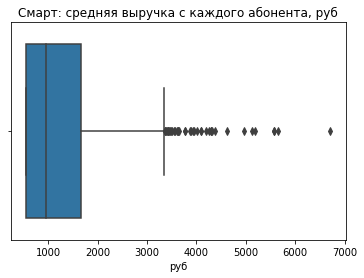

In [56]:
ax = sns.boxplot(x=smart_month['month_revenue']) 
plt.title('Смарт: средняя выручка с каждого абонента, руб')
plt.xlabel('руб')


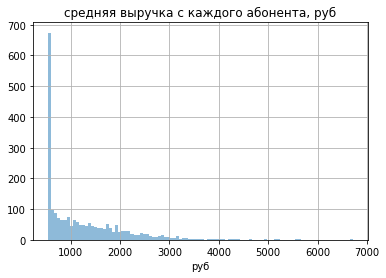

In [57]:
smart_month['month_revenue'].hist(bins=100, alpha=0.5)
plt.title('средняя выручка с каждого абонента, руб')
plt.xlabel('руб')
plt.show()

Подавляющее большинство пользователей тарифа Смарт платят только абонентскую плату в 550 рублей.  Также видно, что пользователи этого тарифа часто покупают дополнительные опции. Выбросы после 3300р.

#### Минуты

In [58]:
smart_month['duration'].mean()

419.0629779577148

In [116]:
'{:.2f}'.format(smart_month['duration'].mean())

'419.06'

In [60]:
smart_month['duration'].median()

423.0

Среднее количество израсходованных минут в месяц - около 420, медиана и среднее почти одинаковы.

In [61]:
np.var(smart_month['duration'], ddof=1) 

35844.1895513438

Дисперсия 35844 . ddof=1 указывает, что датасет - это выборка, а не ГС. 

In [62]:
np.sqrt(np.var(smart_month['duration'], ddof=1))

189.3256177894154

In [63]:
np.std(smart_month['duration'], ddof=1)    # Cтандартное отклонение 

189.3256177894154

Text(0.5, 0, 'мин')

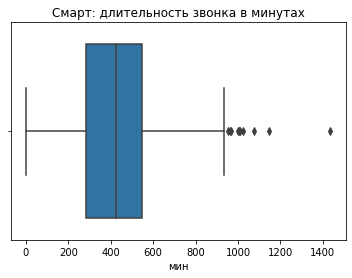

In [64]:
ax = sns.boxplot(x=smart_month['duration'])
plt.title('Смарт: длительность звонка в минутах')
plt.xlabel('мин')

Выбросы свыше 900 мин.

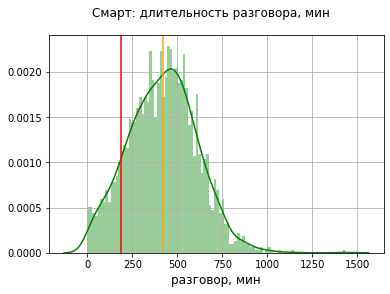

In [65]:
sns.distplot(smart_month['duration'], kde=True, color='green', bins=100)
plt.axvline(smart_month['duration'].median(), c='orange')
plt.axvline(smart_month['duration'].std(), c='red')
plt.suptitle('Смарт: длительность разговора, мин')
plt.xlabel('разговор, мин', fontsize=12)
plt.grid()
plt.show()

В основном люди разговаривают 250-550 минут в месяц. Медиана 423 мин, большинство абонентов проговаривает именно столько в месяц, что входит в пакет. Но много значений лежат свыше 500, значит, клиенты часто дозаказывают минуты разговора. <br> Медиана (оранжевая линия) чуть  больше среднего (419), датасет немного скошен влево. Стандартное отклонение 189 (красная линия).

#### Трафик

In [66]:
smart_month['mb_used'].mean()

16216.859199280252

In [67]:
smart_month['mb_used'].median()

16500.0

Выбросы сверх 30000 мб.

In [68]:
np.var(smart_month['mb_used'], ddof=1)

34820718.273145534

In [69]:
np.std(smart_month['mb_used'], ddof=1)

5900.908258323081

Text(0.5, 0, 'мб')

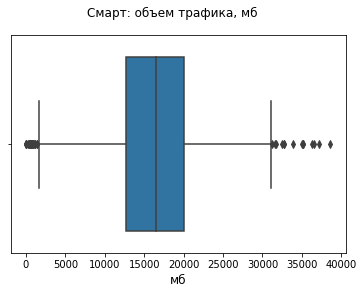

In [70]:
ax = sns.boxplot(x=smart_month['mb_used']) 
plt.suptitle('Смарт: объем трафика, мб')
plt.xlabel('мб', fontsize=12)

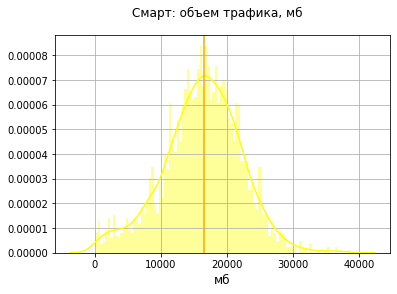

In [71]:
sns.distplot(smart_month['mb_used'], kde=True, color='yellow', bins=100)
plt.axvline(smart_month['mb_used'].median(), c='orange')
plt.suptitle('Смарт: объем трафика, мб')
plt.xlabel('мб', fontsize=12)
plt.grid()
plt.show()

Расход в среднем от 13 до 20 гб. Медиана около 16 гб - вылезает за трафик, включенный в пакет. Значит, часто берут дополнительные мегабайты.

#### SMS

In [72]:
smart_month['sms_used'].mean()

33.3621232568601

In [73]:
smart_month['sms_used'].median()

28.0

In [74]:
np.var(smart_month['sms_used'], ddof=1)

799.4894197921817

In [75]:
np.std(smart_month['sms_used'], ddof=1)

28.275243938685687

Text(0.5, 0, 'смс, шт')

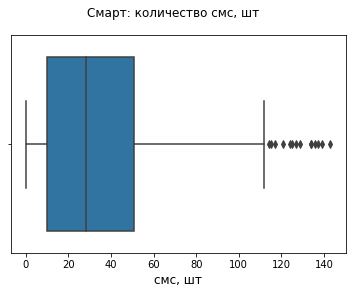

In [76]:
ax = sns.boxplot(x=smart_month['sms_used']) 
plt.suptitle('Смарт: количество смс, шт')
plt.xlabel('смс, шт', fontsize=12)

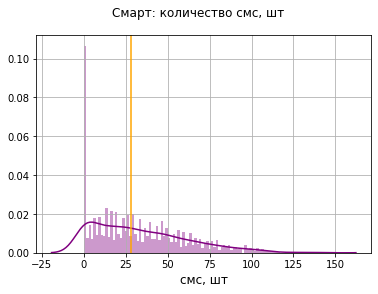

In [77]:
sns.distplot(smart_month['sms_used'], kde=True, color='purple', bins=100)
plt.axvline(smart_month['sms_used'].median(), c='orange') 
plt.suptitle('Смарт: количество смс, шт')
plt.xlabel('смс, шт', fontsize=12)
plt.grid()
plt.show()

Абоненты отправляют мало смс - от 10 до 50 смс, медиана 28. Выбросы после 110.
В тариф включены 50 смс, все равно берут дополнительно.

In [1]:
# то же самое с функцией для графиков

title_dict = {'duration': 'Смарт: длительность разговора, мин', 'mb_used': 'Смарт: объем трафика, мб',
                  'sms_used': 'Смарт: количество смс, шт'}

def histo(df, column_1):
    sns.distplot(df[column_1], kde=True, bins=100)
    plt.axvline(df[column_1].median(), c='orange')
    plt.axvline(df[column_1].std(), c='red')
    plt.suptitle(title_dict[column_1])
    plt.grid()
    plt.show()

histo(smart_month, 'duration')
histo(smart_month, 'mb_used')
histo(smart_month, 'sms_used')

NameError: name 'smart_month' is not defined

### Тариф Ультра

In [79]:
ultra_month = df.query('tariff_name == "ultra"')
ultra_month.sample(7, random_state=42)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,mb_used,sms_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,min_over,mb_over,sms_over,month_revenue
752,1120,25.0,0,Краснодар,Агнесса,Абдулина,2018-01-24,ultra,2.0,162.0,4213.0,0.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,0.000000,0.0,1950.000000
1599,1255,40.0,2018-09-02,Саранск,Серафима,Пономарева,2018-02-19,ultra,6.0,198.0,37635.0,0.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,1012.939453,0.0,2962.939453
2366,1377,59.0,0,Брянск,Альфред,Семин,2018-02-25,ultra,10.0,1401.0,4887.0,10.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,0.000000,0.0,1950.000000
2469,1391,47.0,0,Стерлитамак,Герасим,Аркадьев,2018-05-12,ultra,11.0,669.0,27516.0,3.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,0.000000,0.0,1950.000000
1881,1300,40.0,0,Москва,Тихон,Азерников,2018-07-26,ultra,8.0,701.0,34329.0,171.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,528.662109,0.0,2478.662109
2194,1352,53.0,0,Рязань,Кристина,Румянцева,2018-04-17,ultra,10.0,816.0,15693.0,6.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,0.000000,0.0,1950.000000
2741,1430,22.0,0,Тверь,Андрей,Авроров,2018-04-23,ultra,7.0,322.0,21376.0,46.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,0.0,0.000000,0.0,1950.000000


In [80]:
ultra_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 3152
Data columns (total 24 columns):
user_id                  953 non-null int64
age                      953 non-null float64
churn_date               953 non-null object
city                     953 non-null object
first_name               953 non-null object
last_name                953 non-null object
reg_date                 953 non-null object
tariff                   953 non-null object
month                    953 non-null float64
duration                 953 non-null float64
mb_used                  953 non-null float64
sms_used                 953 non-null float64
messages_included        953 non-null float64
mb_per_month_included    953 non-null float64
minutes_included         953 non-null float64
rub_monthly_fee          953 non-null float64
rub_per_gb               953 non-null float64
rub_per_message          953 non-null float64
rub_per_minute           953 non-null float64
tariff_name              953

In [81]:
ultra_month[['duration', 'mb_used', 'sms_used', 'month_revenue']].describe().style.format('{:.2f}')

,duration,mb_used,sms_used,month_revenue
count,953.00,953.00,953.00,953.00
mean,544.31,19366.97,48.45,2061.24
std,307.62,10222.07,46.61,359.12
min,0.00,0.00,0.00,1950.00
25%,310.00,11421.00,5.00,1950.00
50%,526.00,19297.00,38.00,1950.00
75%,756.00,26852.00,78.00,1950.00
max,1673.00,49789.00,224.00,4743.31


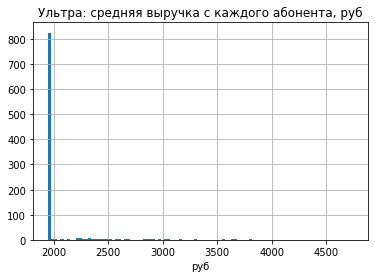

In [82]:
ultra_month['month_revenue'].hist(bins=100)
plt.title('Ультра: средняя выручка с каждого абонента, руб')
plt.xlabel('руб')
plt.show()

Подавляющее большинство пользователей тарифа Ультра платят только абонентскую плату в 1950 рублей и очень мало берут сверх тарифа.

#### Минуты

In [83]:
ultra_month['duration'].mean()

544.3064008394543

In [84]:
ultra_month['duration'].median()

526.0

Среднее количество израсходованных минут в месяц - около 535, медиана и среднее имеют близкие значения.

In [85]:
np.var(ultra_month['duration'], ddof=1)

94629.23585184336

In [86]:
np.std(ultra_month['duration'], ddof=1)

307.61865328982145

Text(0.5, 0, 'мин')

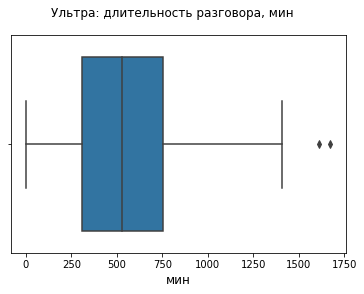

In [87]:
ax = sns.boxplot(x=ultra_month['duration']) 
plt.suptitle('Ультра: длительность разговора, мин')
plt.xlabel('мин', fontsize=12)

В основном 300-750 минут, а включено аж 3000! Даже выбросы меньше лимита.

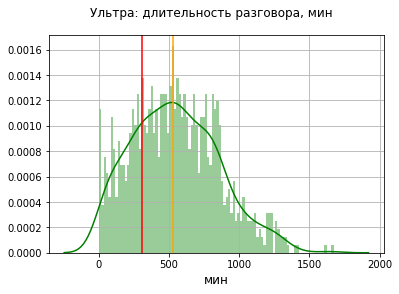

In [88]:
sns.distplot(ultra_month['duration'], kde=True, color='green', bins=100)
plt.axvline(ultra_month['duration'].median(), c='orange')
plt.axvline(ultra_month['duration'].std(), c='red')
plt.suptitle('Ультра: длительность разговора, мин')
plt.xlabel('мин', fontsize=12)
plt.grid()
plt.show()

В среднем разговаривают 526 минут, от 300 до 750. Медиана Ультра выше Смарта (423). Выбросы после 1400.

#### Трафик

In [89]:
ultra_month['mb_used'].mean()

19366.96747114376

In [90]:
ultra_month['mb_used'].median()

19297.0

In [91]:
np.var(ultra_month['mb_used'], ddof=1)

104490776.45167185

In [92]:
np.std(ultra_month['mb_used'], ddof=1)

10222.073001679839

Text(0.5, 0, 'мб')

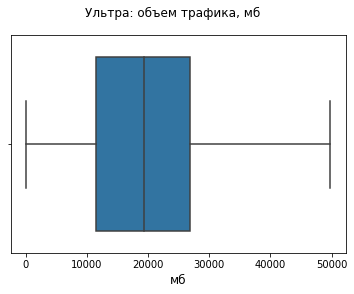

In [93]:
ax = sns.boxplot(x=ultra_month['mb_used']) 
plt.suptitle('Ультра: объем трафика, мб')
plt.xlabel('мб', fontsize=12)

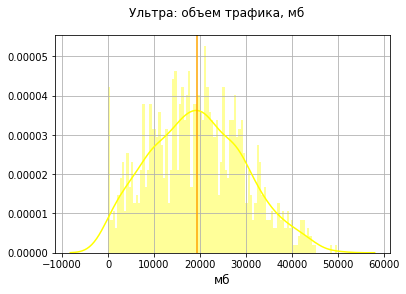

In [94]:
sns.distplot(ultra_month['mb_used'], kde=True, color='yellow', bins=100)
plt.axvline(ultra_month['mb_used'].median(), c='orange') 
plt.suptitle('Ультра: объем трафика, мб')
plt.xlabel('мб', fontsize=12)
plt.grid()
plt.show()

Медиана 19 гб, от 11 до 28 гб. В тариф включены 30 гб, значит, в большинстве своем клиентам хватает гб.

#### SMS

In [95]:
ultra_month['sms_used'].mean()

48.45225603357817

In [96]:
ultra_month['sms_used'].median()

38.0

In [97]:
np.var(ultra_month['sms_used'], ddof=1)

2172.9286529932015

In [98]:
np.std(ultra_month['sms_used'], ddof=1)

46.614682804811636

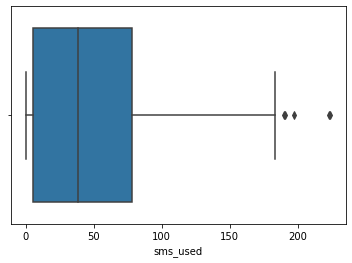

In [99]:
ax = sns.boxplot(x=ultra_month['sms_used']) 

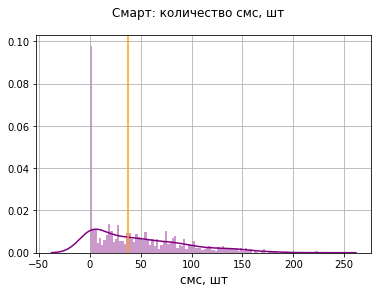

In [100]:
sns.distplot(ultra_month['sms_used'], kde=True, color='purple', bins=100)
plt.axvline(ultra_month['sms_used'].median(), c='orange')
plt.suptitle('Смарт: количество смс, шт')
plt.xlabel('смс, шт', fontsize=12)
plt.grid()
plt.show()

Абоненты отправляют мало смс - в среднем от 5 до 75 смс, медиана 38. Выбросы свыше 180.


В общем, с такими лимитами в тарифе Ультра докупать ничего не нужно.  <br> Ниже повтор график с использованием функции.

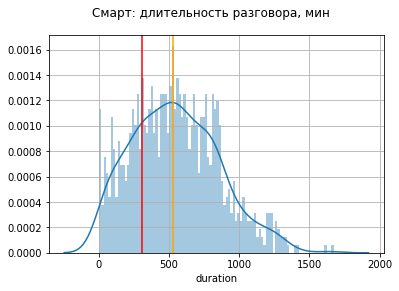

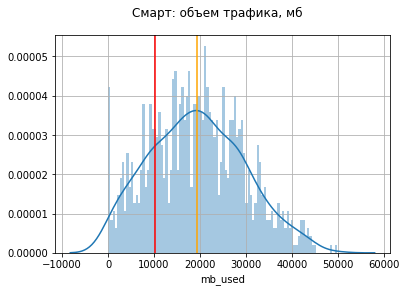

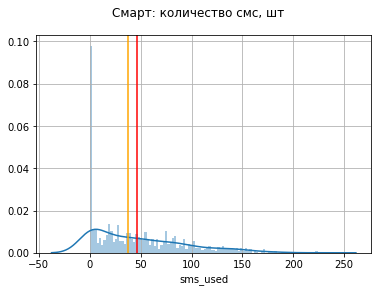

In [101]:
histo(ultra_month, 'duration')
histo(ultra_month, 'mb_used')
histo(ultra_month, 'sms_used')

### Разное

In [102]:
all_min = df['duration'].sum()
df.groupby(['tariff_name'])['duration'].agg(['sum', 'mean', 'median']).style.format('{:.0f}')

,sum,mean,median
tariff_name,,,
0,0,0,0
smart,931577,419,423
ultra,518724,544,526


In [103]:
all_mb = df['mb_used'].sum()
df.groupby(['tariff_name'])['mb_used'].agg(['sum', 'mean', 'median']).style.format('{:.0f}')

,sum,mean,median
tariff_name,,,
0,862661,18754,17974
smart,36050078,16217,16500
ultra,18456720,19367,19297


In [104]:
all_sms = df['sms_used'].sum()
df.groupby(['tariff_name'])['sms_used'].agg(['sum', 'mean', 'median']).style.format('{:.0f}')

,sum,mean,median
tariff_name,,,
0,2697,59,30
smart,74164,33,28
ultra,46175,48,38


Ранее мы нашли, что доля клиентов с тарифом Смарт составляет около 70% и что этот тариф приносит большую часть выручки. Здесь мы видим, что клиенты с этим тарифом генерируют больше трафика, совершают больше звонков и отправляют больше смс.


Проанализировали сформированные по двум тарифам датафреймы с помощью гистограмм, диаграмм размаха и нахождения основных статистик. Основной вывод - абоненты тарифа Смарт часто берут дополнительные минуты и мегабайты, а абоненты Ультры часто даже не израсходуют свой пакет.

## Гипотезы

### Первая о тарифах

Первая гипотеза о равенстве средних двух генеральных совокупностей: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. <br> <br>
Нулевая гипотеза: средняя выручка Смарт НЕ отличается от средней выручки Ультра. <br>
Альтернативная гипотеза: средняя выручка Смарт отличается от средней выручки Ультра.  <br>
Выборки по двум тарифам независимые, используем метод ttest_ind из пакета scipy.stats.<br>
Зададим общепринятый критический уровень статистической значимости 0.05 и если p-value окажется меньше него - отвергнем гипотезу.

In [105]:
from scipy import stats as st

alpha = .05 


results = st.ttest_ind(
    smart_month['month_revenue'], 
    ultra_month['month_revenue'],
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу, выручка одинаковая')

p-значение: 5.746108265304587e-185
Отвергаем нулевую гипотезу


p-уровень значимости - очень маленькое число, стремящееся к нулю. Значит, нулевая гипотеза отвергнута. Логично, что пользователи тарифа Ультра приносят больше денег хотя бы потому, что их абонплата в 3,5 раза больше, чем плата за тариф Смарт. 

In [106]:
smart_month['month_revenue'].mean()

1233.8517171333783

In [107]:
ultra_month['month_revenue'].mean()

2061.237283168284

### Вторая о городах

Вторая гипотеза  о равенстве средних двух генеральных совокупностей: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. <br> <br>

Нулевая гипотеза: средняя выручка Москвы НЕ отличается от средней выручки регионов. <br>
Альтернативная гипотеза: средняя выручка Москвы отличается от средней выручки регионов. <br>
Выборки по двум тарифам независимые, используем метод ttest_ind из пакета scipy.stats.  <br>
Зададим общепринятый критический уровень статистической значимости 0.05 и если p-value окажется меньше него - отвергнем гипотезу.

In [108]:
msk_users = df.query('city == "Москва"')
other_users = df.query('city != "Москва"')

In [109]:
alpha = 0.05

results = st.ttest_ind(
    msk_users['month_revenue'], 
    other_users['month_revenue'],
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11792463255006935
Не получилось отвергнуть нулевую гипотезу


Значит, средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов.

In [110]:
msk_users['month_revenue'].mean()

1506.5509861680328

In [111]:
other_users['month_revenue'].mean()

1450.3121732329155

Проверили. Действительно, средняя выручка отличается только на 50 руб.

In [112]:
df_city = users['city'].value_counts(normalize=True)
df_city.head(7)

Москва             0.198
Санкт-Петербург    0.078
Новосибирск        0.032
Казань             0.028
Омск               0.028
Уфа                0.024
Краснодар          0.022
Name: city, dtype: float64

In [113]:
df_city_smart = smart_month['city'].value_counts(normalize=True)
df_city_smart.head(7)

Москва             0.173639
Санкт-Петербург    0.092668
Ульяновск          0.036437
Казань             0.033288
Уфа                0.029240
Новосибирск        0.024291
Омск               0.024291
Name: city, dtype: float64

In [114]:
df_city_ultra = ultra_month['city'].value_counts(normalize=True)
df_city_ultra.head(7)

Москва             0.235047
Санкт-Петербург    0.059811
Новосибирск        0.046170
Пенза              0.045121
Краснодар          0.043022
Уфа                0.031480
Воронеж            0.031480
Name: city, dtype: float64

Доля клиентов из Москвы составляет почти 20%. В дф тарифа Смарт - 17%, Ультра - 23,5% - в Москве чаще выбирают дорогой тариф.

## Вывод

Мы обработали пять датафреймов, исправили типы данных, ввели новые столбцы, необходимые для расчётов. <br>
Посчитали для каждого пользователя по месяцам: количество минут разговора, количество отправленных сообщений, объем израсходованного трафика - и далее выручку. Далее построили таблицы и гистограммы, на основе которых сделали заключения. <br>

Почти 70% абонентов используют тариф Смарт, 30% - Ультра. Большую долю дохода приносит тариф Смарт: клиенты с этим тарифом генерируют в два раза больше трафика, на 40% - совершают больше звонков и отправляют больше смс. <br>
Общая выручка за год - 4,7 млн руб.; по тарифу Смарт - 2,74 млн руб.; по тарифу Ультра - 1,96 млн руб. <br>
Средний платеж в месяц тарифа Смарт на 60% меньше (1234 руб.) чем у тарифа Ультра (2061 руб.).  

-------------------------

Большинство пользователей тарифа Смарт платят только абонентскую плату в 550 рублей. Также видно, что пользователи этого тарифа часто покупают дополнительные опции. <br> 
В основном люди разговаривают 250-550 минут в месяц. Среднее 423 мин - большинство абонентов проговаривает именно столько минут в месяц, что входит в пакет, но значение стремится к лимиту в 500 минут. Часто берут дополнительный пакет. <br>
Клиенты с тарифом Смарт обычно расходуют от 13 до 20 гб. В среднем 16 гб - этот объем больше трафика в 15 гб, включенного в абонплату. Им приходится покупать дополнительные 1-2 гб. <br>
Абоненты отправляют мало смс - от 10 до 50 смс, в среднем 28.  <br> В итоге можно сказать, что тариф Смарт несбалансирован - абоненты часто прибегают к дополнительным пакетам - средний платеж в два раза больше абонплаты и составляет 1000-1200 руб.

-------------------------

Большинство пользователей тарифа Ультра платят только абонентскую плату в 1950 рублей и очень мало берут сверх тарифа. <br>
В среднем разговаривают 526 минут, от 300 до 750 мин, чего им с лихвой хватает: ведь в тариф заложены целых 3000 минут.  <br>
Средний пользователь тарифа Ультра расходует 19 гб, от 11 до 28 гб. В тариф включены 30 гб, значит, в большинстве своем клиентам хватает гб. <br> Абоненты отправляют мало смс - от 1 до 75 смс, в среднем 38.  <br>
Клиенты с тарифом Ультра обычно не истрачивают включенных в тариф минут и трафика. Можно сказать, что они сильно переплачивают за возможность не переживать о лимитах.

-------------------------

Гипотезы сформированы и проверены. Нашли, что пользователи тарифа Ультра приносят больше денег. Это логично хотя бы потому, что их абонплата в 3,5 раза больше, чем плата за тариф Смарт. Также обнаружили неочевидную вещь: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

-------------------------
В конце хотим посоветовать оператору внедрить третий тариф - Смарт Плюс - в него за 950-1050 рублей в месяц могли бы быть включены 700-750 минут и 20-25 гб трафика. Ведь средний чек и так составляет около тысячи рублей. Или переименовать Смарт в Стандарт, а ввести обновленный Смарт.